In [14]:
#importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

In [3]:
#Open Dataset File from your computer and load it into Google Colab
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Salary.csv to Salary.csv
User uploaded file "Salary.csv" with length 454 bytes


In [4]:
df = pd.read_csv('Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
X = df["YearsExperience"]
y = df["Salary"]

In [6]:
X.ndim

1

In [7]:
X.shape

(30,)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [9]:
X_train=np.reshape(X_train,(-1,1))
X_test=np.reshape(X_test,(-1,1))

In [10]:
X_train.shape

(22, 1)

In [28]:
model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Activation('linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model = Sequential()                      # Create a Squential Model
model.add(Dense (1,activation='sigmoid', input_dim=1, use_bias =True)  ) # I/P Layer
model.add(Dense (1,activation='linear' ) ) # O/P Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='mse',optimizer=SGD(0.01))   ### mse loss for regression

In [31]:
history = model.fit(X_train,y_train,epochs=500, batch_size=5, validation_split=0.2)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 3614788864.0000 - val_loss: 141517360.0000
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 134889568.0000 - val_loss: 162910512.0000
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 120696080.0000 - val_loss: 143441472.0000
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 142751664.0000 - val_loss: 126523456.0000
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 123196920.0000 - val_loss: 125430680.0000
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 121205296.0000 - val_loss: 156454176.0000
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 160986240.0000 - val_loss: 145395232.0000
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 99780880.0000 - val_loss: 155191520.0000
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 108395344.0000 - val_loss: 109305200.0000
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 111309704.0000 - val_loss: 109118608.0000

In [32]:
pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [33]:
pred

array([[ 54738.594],
       [ 99287.2  ],
       [ 59477.81 ],
       [114452.69 ],
       [ 36729.582],
       [102130.72 ],
       [ 34833.9  ],
       [ 72747.61 ]], dtype=float32)

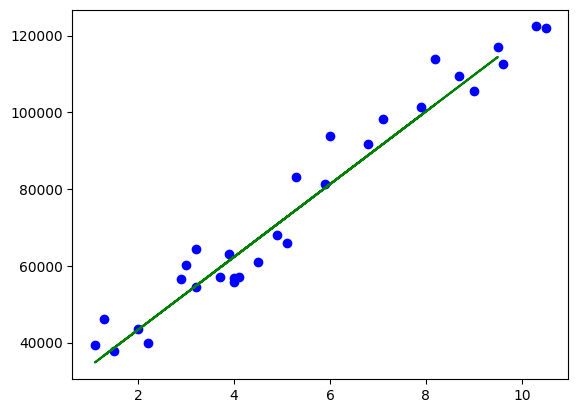

In [34]:
plt.scatter(X, y, c='blue')
plt.plot(X_test, pred, color='g')
plt.show()

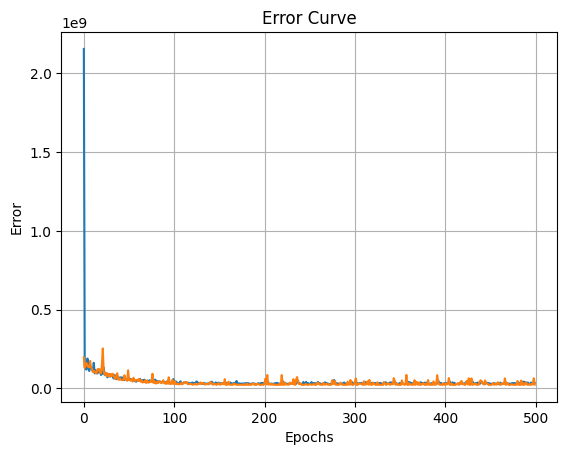

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Error Curve")
plt.ylabel("Error")
plt.xlabel("Epochs")
plt.grid()

In [ ]:
pred= model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
pred

array([[100045.44 ],
       [111625.69 ],
       [ 97373.08 ],
       [ 38581.094],
       [ 62632.363],
       [ 63523.15 ],
       [ 36799.52 ],
       [ 40362.67 ]], dtype=float32)

In [ ]:
result=model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 49161136.0000


In [35]:
#Open Dataset File from your computer and load it into Google Colab
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IQ.xlsx to IQ.xlsx
User uploaded file "IQ.xlsx" with length 9870 bytes


In [51]:
df=pd.read_excel('IQ.xlsx')
df

,Birthweight,IQ
0,575,59
1,650,55
2,832,67
3,850,84
4,933,87
5,1001,81
6,1111,88
7,1230,92
8,1321,101
9,1370,102


In [52]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [60]:
X=np.array(X)/np.max(X)
y=np.array(y)

In [61]:
model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Activation('linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.compile(loss='mse',optimizer=SGD(0.02))

In [72]:
history = model.fit(X,y,epochs=500,validation_split=0.2,verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step - loss: 6677.5679 - val_loss: 10670.2510
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 5901.6772 - val_loss: 9616.9326
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 5216.9990 - val_loss: 8677.5938
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 4612.8091 - val_loss: 7839.4355
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4079.6453 - val_loss: 7091.1235
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3609.1570 - val_loss: 6422.6270
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 3193.9753 - val_loss: 5825.0552
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 2827.5989 - val_loss: 5290.5386
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 2504.2893 - val_loss: 4812.1006
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 2218.9839 - val_loss: 4383.5601
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1967.2142 - val_loss: 3999.4363
Ep

In [74]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


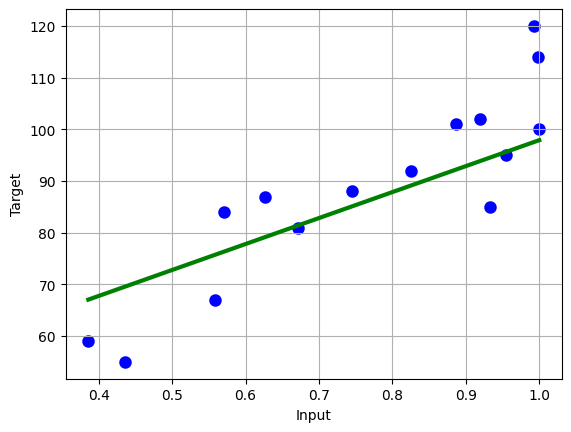

In [75]:
plt.scatter(X, y, c='blue' , linewidth=3)
plt.plot(X, pred, color='g', linewidth=3)
plt.ylabel("Target")
plt.xlabel("Input")
plt.grid()

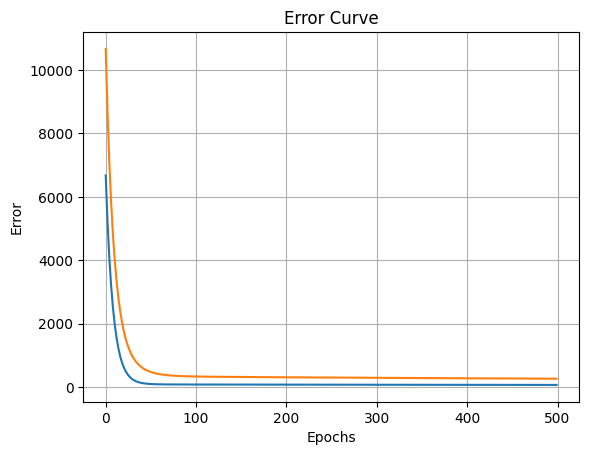

In [76]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Error Curve")
plt.ylabel("Error")
plt.xlabel("Epochs")
plt.grid()